Data Science Capstone
=

>***A Message to the reader***\
    \
This is the personal notebook of the entire course, given the avobe, i use spanish (my native language) and english language, oriented to optimize my own learning of this amazing discipline 😍


# 1. Introducción

## 1.1 Project Overview

> Objetivo: **Predecir si la *Stage 1* aterrizará sin problemas** durante el lanzamiento de un cohete espacial realizado por Space X



## 1.2 Collecting data

Data Sources:
- **SpaceX REST API:** https://api.spacexdata.com/v4
    
    API's Endpoints:
    - https://api.spacexdata.com/v4/capsules
    - https://api.spacexdata.com/v4/cores
    - https://api.spacexdata.com/v4/launches/past
    

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime as dt

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [2]:
# GET REQUEST EXAMPLE


url = 'https://api.spacexdata.com/v4/launches/past'
response = requests.get(url)
response.json()

# El formato de salida de la API es un JSON contenido en una lista, donde c/ item en la lista corresponde a un lanzamiento.
# Al pasar a un dataframe, pandas convierte c/item en la lista a una fila en el df

data = pd.json_normalize(response.json())
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

al hacer *data wrangling* se tendran desafios como:
- Wrangling data from APIs
- Null values
- filtrar data que no es de interes
- Utilizar API functions especificas para traer caracteristicas especificas de los cohetes, lanzamientos, etc


### 1.2.1 LAB: Data Collection API

> A continuacion, las actividades del primer lab: *data collection*

In [3]:
# Metodos para traer data desde funciones especificas

def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])
#
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])
#

def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [4]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
if response.content:
    print('OK')

OK


#### 1.2.1.1 Request and parse the SpaceX launch data using the GET request
To make the requested JSON results more consistent, we will use the following static response object for this project:

In [5]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
r = requests.get(url)
data = pd.json_normalize(r.json())
data.head()


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [6]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= dt.date(2020, 11, 13)]
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


*   From the `rocket` we would like to learn the booster name

*   From the `payload` we would like to learn the mass of the payload and the orbit that it is going to

*   From the `launchpad` we would like to know the name of the launch site being used, the longitude, and the latitude.

*   From `cores` we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.


In [7]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [8]:
# Call getBoosterVersion
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

Hasta aca, limpiamos el dataset original, y se llamo a las function APIs que contienen la data de interes para almacenar todo en listas.

Lo anterior se debe unificar para crear el nuevo dataframe
    

In [9]:
launch_dict = {
    'FlightNumber': list(data['flight_number']),
    'Date': list(data['date']),
    'BoosterVersion':BoosterVersion,
    'PayloadMass':PayloadMass,
    'Orbit':Orbit,
    'LaunchSite':LaunchSite,
    'Outcome':Outcome,
    'Flights':Flights,
    'GridFins':GridFins,
    'Reused':Reused,
    'Legs':Legs,
    'LandingPad':LandingPad,
    'Block':Block,
    'ReusedCount':ReusedCount,
    'Serial':Serial,
    'Longitude': Longitude,
    'Latitude': Latitude}

launch_df = pd.DataFrame.from_dict(launch_dict)
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [10]:
launch_df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,94.000000,88.000000,94.000000,90.000000,94.000000,94.000000,94.000000
mean,54.202128,5919.165341,1.755319,3.500000,2.670213,-75.553302,28.581782
std,30.589048,4909.689575,1.197544,1.595288,3.412149,53.391880,4.639981
min,1.000000,20.000000,1.000000,1.000000,0.000000,-120.610829,9.047721
25%,28.250000,2406.250000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,52.500000,4414.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,81.500000,9543.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,106.000000,15600.000000,6.000000,5.000000,10.000000,167.743129,34.632093


#### 1.2.1.2 Filter the dataframe to only include Falcon 9 launches
Finally we will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the `BoosterVersion` column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called `data_falcon9`.

In [11]:
data_falcon9 = launch_df[launch_df['BoosterVersion'] == 'Falcon 9']
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [12]:
#Resetear el contador
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,10,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,9,B1060,-80.577366,28.561857


In [13]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

#### 1.2.1.3 Dealing with Missing Values
Calculate below the mean for the PayloadMass using the .mean(). Then use the mean and the .replace() function to replace np.nan values in the data with the mean you calculated.

In [14]:
data_falcon9['PayloadMass'].mean()

data_falcon9['PayloadMass'].replace(np.nan,data_falcon9['PayloadMass'].mean(), inplace=True)
data_falcon9.isnull().sum()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

### 1.2.2 LAB: Data Collection with WebScraping 

> Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia

In this lab, you will be performing web scraping to collect Falcon 9 historical launch records from a Wikipedia page titled List of Falcon 9 and Falcon Heavy launches

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches

More specifically, the launch records are stored in a HTML table shown below: ![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_1\_L2/images/falcon9-launches-wiki.png)


### Objectives
Web scrap Falcon 9 launch records with BeautifulSoup:
-  Extract a Falcon 9 launch records HTML table from Wikipedia
- Parse the table and convert it into a Pandas data frame

In [15]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [16]:
#FUNCIONES AUXILIARES
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

In [17]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

#### 1.2.2.1 Request the Falcon9 Launch Wiki page from its URL

Para extraer la tabla requerida, `html_tables` filtra las tablas del sitio, luego, se extrae la tercera que es la que se esta buscando

In [18]:
r = requests.get(static_url)
soup = BeautifulSoup(r.content)
html_tables = soup.find_all('table')

# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>
<tr>
<th rowspan="2" scope="row" style="text-align:center;">1
</th>
<td>

In [19]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

#### 1.2.2.3 Extract all column/variable names from the HTML table header


In [20]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names


for row in first_launch_table.find_all('th'):
    colname = extract_column_from_header(row)
    if ((colname is not None) and len(colname)>0):
        column_names.append(extract_column_from_header(row))
column_names


['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

### 1.2.2.4 Create a data frame by parsing the launch HTML tables

Primero, se crea un diccionario vacio, se quitan/agregan columnas segun la utilidad de estas.\
Terminado lo anterior, se llena el dict con los datos de cada fila de la tabla.

Usually, HTML tables in Wiki pages are likely to contain unexpected annotations and other types of noises, such as reference links `B0004.1[8]`, missing values `N/A [e]`, inconsistent formatting, etc.

To simplify the parsing process, we have provided an incomplete code snippet below to help you to fill up the `launch_dict`. Please complete the following code snippet with TODOs or you can choose to write your own logic to parse all launch tables:

> **EL SCRAPING NO FUNCIONA**

In [21]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [22]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            launch_dict['Flight No.'].append(flight_number)
            #print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            #print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            #print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            #print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            #print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            #print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            #print(payload_mass)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            #print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            if row[6].a:
                customer = row[6].a.string
            else:
                customer = ''
            launch_dict['Customer'].append(customer)
            #print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            #print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            #print(booster_landing)
            

## 1.3 Data Wrangling

Resumen del dataset.

**Variables:**

1. **Launchsite:** Lugar donde se hizo el lanzamiento, entre estos está
    - Vandenberg  AFB Space launch
    - Kennedy Space Center
    - CCAFS SLC 40

2. **Orbit:** Diferenes órbitas que siguió el elemento lanzado al espacio
    - LEO
    - HEO
    - MEO
    - GEO

3. **Outcome:** Indica si la 1era etapa aterrizó satisfactoriamente y el cómo. Existen 8 categorías según la forma en que aterrizó
    Para esta variable, la idea es llevarlo a un boolean para apuntar el modelo a su predicción
    
    
### 1.3.1 LAB: Data Wrangling - EDA

> La idea es identificar ciertos patrones en los datos y determinar la forma de la data para correr modelos aprendizaje supervisado\
    Perform exploratory Data Analysis and determine Training Labels\
    - Exploratory Data Analysis\
    - Determine Training Labels


In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed on a drone ship False ASDS means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with 1 means the booster successfully landed 0 means it was unsuccessful.

In [23]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [24]:
# MISSING VALUES percentage
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [25]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

#### 1.3.1.1 Calculate the number of launches on each site

In [27]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01"> \[11] </a>

some are shown in the following plot:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

#### 1.3.1.2 Calculate the number and occurrence of each orbit

In [28]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
SO        1
HEO       1
GEO       1
Name: Orbit, dtype: int64

#### 1.3.1.3 Calculate the number and occurence of mission outcome per orbit type

In [29]:
#landing_outcomes = list(df['Outcome'].unique())
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.


In [30]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)
    
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

#### 1.3.1.4 Create a landing outcome label from Outcome column

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>

In [31]:
landing_class = []
for i in df['Outcome']:
    if i in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

        
df['Class']=landing_class
df.head(8)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


df["Class"].mean()

In [32]:
# Calculate the number and occurence of mission outcome per orbit type
df.groupby('Orbit')['Class'].value_counts()

Orbit  Class
ES-L1  1         1
GEO    1         1
GTO    1        14
       0        13
HEO    1         1
ISS    1        13
       0         8
LEO    1         5
       0         2
MEO    1         2
       0         1
PO     1         6
       0         3
SO     0         1
SSO    1         5
VLEO   1        12
       0         2
Name: Class, dtype: int64

# 2. Exploratory Data Analysis (EDA)

> El primer paso para cualquier proyecto de *Data Science*

## 2.1 EDA using SQL

Puntos a ejecutar:

1. Medir gráficamente año vs % de éxito .  *El % de éxito desde 2013 ha mejorado*
2. Medir gráficamente *Launch Site* vs % de éxito.
3. En un graf de dispersión mostrar *payload mass(kg)* vs *Launch site* abierto a color según el boolean *aterrizó o no con éxito*
4. Hacer dummies para todas las variables categóricas}


### 2.1.1 LAB: EDA With SQL

> **Objetivos:**\
    1. Understand the Spacex DataSet\
    2. Load the dataset into the corresponding table in a Db2 database\
    3. Execute SQL queries to answer assignment questions

In [35]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql
!pip install Flask-SQLAlchemy

     |████████████████████████████████| 6.0 MB 8.7 MB/s eta 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp38-cp38-linux_x86_64.whl size=1209515 sha256=9da8b24fe0a8f42d4d3e4145b16ab8a38bd8c9adb272d12ff7df43852dafba4a
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/cb/43/46/fa638f2422554332b7865d600275b24568bf60e76104a94bb4
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.22
    Uninstalling SQLAlchemy-1.4.22:
      Successfully uninstalled SQLAlchemy-1.4.22
     |████████████████████████████████| 42 kB 2.3 MB/s  eta 0:00:01
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13700 sha256=565726bf25fc7bfb07ed30f76c813b4d4383c1ac3642131d4a4fff919eae5136
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
Successfully built prettytable
     |████████████████████████████████| 95 kB 6.8 MB/s  eta 0:00:01


In [62]:
%load_ext sql
%sql ibm_db_sa://nmt82938:BUWUxMrEP4OlXI7q@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb?security=SSL

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [100]:
# 1. Display the names of the unique launch sites  in the space mission
%sql SELECT DISTINCT LAUNCH_SITE from NMT82938.SPACEXTBL

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


In [64]:
# 2. Display 5 records where launch sites begin with the string 'CCA'
%sql SELECT * FROM NMT82938.SPACEXTBL \
    WHERE LAUNCH_SITE LIKE 'CCA%' \
    LIMIT 5

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


DATE,time__utc_,booster_version,launch_site,payload,payload_mass__kg_,orbit,customer,mission_outcome,landing__outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [101]:
# 3. Display the total payload mass carried by boosters launched by NASA (CRS)
%sql SELECT SUM(PAYLOAD_MASS__KG_) as TOTAL_PAYLOAD_MASS_KG FROM NMT82938.SPACEXTBL \
    WHERE CUSTOMER LIKE '%NASA%'

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


total_payload_mass_kg
107010


In [102]:
#4. Display average payload mass carried by booster version F9 v1.1
%sql SELECT avg(PAYLOAD_MASS__KG_) as AVG_PAYLOAD_MASS_KG  FROM NMT82938.SPACEXTBL \
WHERE BOOSTER_VERSION LIKE 'F9 v1.1%'

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


avg_payload_mass_kg
2534


In [107]:
#5. List the date when the first successful landing outcome in ground pad was acheived
%sql SELECT MIN(DATE) as FIRST_SUCCESFUL_LANDING FROM NMT82938.SPACEXTBL \
WHERE landing__outcome = 'Success (ground pad)'

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


first_succesful_landing
2015-12-22


In [105]:
%sql SELECT distinct(LANDING__OUTCOME) FROM NMT82938.SPACEXTBL 


 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


landing__outcome
Controlled (ocean)
Failure
Failure (drone ship)
Failure (parachute)
No attempt
Precluded (drone ship)
Success
Success (drone ship)
Success (ground pad)
Uncontrolled (ocean)


In [68]:
#6. List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%sql SELECT  BOOSTER_VERSION FROM NMT82938.SPACEXTBL \
WHERE LANDING__OUTCOME like '%drone ship%' \
    AND PAYLOAD_MASS__KG_ > 4000 \
    AND PAYLOAD_MASS__KG_ < 6000

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


booster_version
F9 FT B1020
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [69]:
#7. List the total number of successful and failure mission outcomes
%sql SELECT mission_outcome, COUNT(mission_outcome) AS COUNT FROM NMT82938.SPACEXTBL \
 GROUP BY mission_outcome


 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


mission_outcome,COUNT
Failure (in flight),1
Success,99
Success (payload status unclear),1


In [70]:
#8. List the names of the booster_versions which have carried the maximum payload mass. Use a subquery
%sql SELECT BOOSTER_VERSION FROM NMT82938.SPACEXTBL \
    WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM NMT82938.SPACEXTBL)

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


booster_version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [71]:
#9. List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015
%sql SELECT * FROM NMT82938.SPACEXTBL \
WHERE LANDING__OUTCOME = 'Failure (drone ship)' \
AND YEAR(DATE)= 2015

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


DATE,time__utc_,booster_version,launch_site,payload,payload_mass__kg_,orbit,customer,mission_outcome,landing__outcome
2015-01-10,09:47:00,F9 v1.1 B1012,CCAFS LC-40,SpaceX CRS-5,2395,LEO (ISS),NASA (CRS),Success,Failure (drone ship)
2015-04-14,20:10:00,F9 v1.1 B1015,CCAFS LC-40,SpaceX CRS-6,1898,LEO (ISS),NASA (CRS),Success,Failure (drone ship)


In [111]:
#10. Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order

%sql select COUNT(LANDING__OUTCOME) AS COUNT_DRONE_SHIP, YEAR(DATE) AS YEAR from NMT82938.SPACEXTBL \
WHERE LANDING__OUTCOME IN ('Failure (drone ship)','Success (drone ship)') \
AND DATE BETWEEN '2010-06-04' AND '2017-03-20' \
GROUP BY YEAR(DATE) \
ORDER BY COUNT(LANDING__OUTCOME) DESC

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


count_drone_ship,YEAR
7,2016
2,2015
1,2017


In [73]:
%sql select distinct(LANDING__OUTCOME) from NMT82938.SPACEXTBL 

 * ibm_db_sa://nmt82938:***@764264db-9824-4b7c-82df-40d1b13897c2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:32536/bludb
Done.


landing__outcome
Controlled (ocean)
Failure
Failure (drone ship)
Failure (parachute)
No attempt
Precluded (drone ship)
Success
Success (drone ship)
Success (ground pad)
Uncontrolled (ocean)


### 2.1.2 LAB:  EDA Visualization
> **Objetivos:**
    Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`\
    -   Exploratory Data Analysis\
    -   Preparing Data  Feature Engineering


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('done')

done


In [75]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


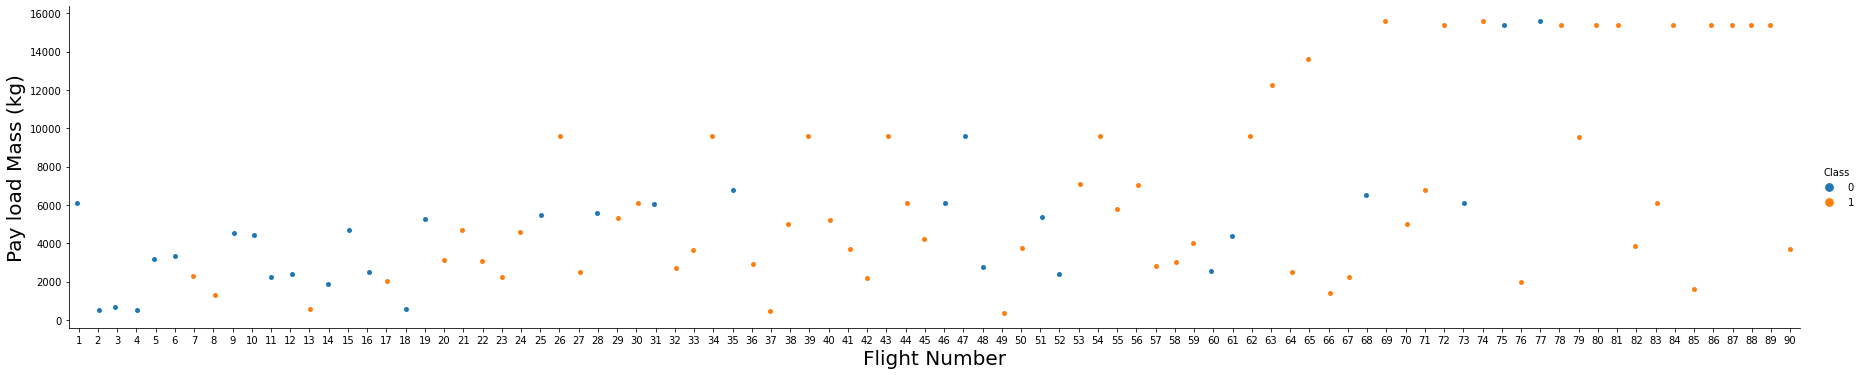

In [76]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

En el gráfico de ejemplo, se concluye que:
- A medida que se ejecutan más vuelos, mejora la probabilidad de tener un aterrizaje exitoso de la *First Stage*
- También, hay una señal (un poco difusa) de que a mayor masa se transporte, disminuye la probabilidad de tener un aterrizaje exitoso de la *First Stage*]


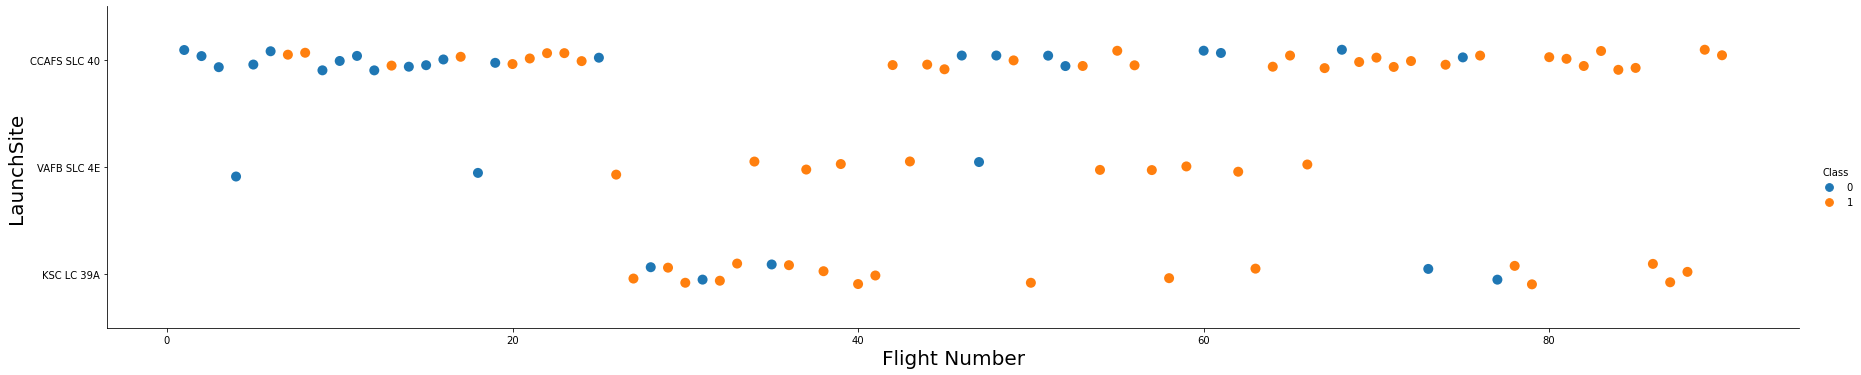

In [89]:
#1. Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5, s=10)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)

plt.show()

En el gráfico 1 se ve que:
- Hasta el 25° vuelo aprox. casi todos los lanzamientos se hacía en CCAFS SLS 40, conj una alta tasa de fallos
- Desde el 26° aprox, se utilizan otras locaciones con mayor frecuencia

Como resultado, a lo largo del tiempo mejoró la probabilidad de aterrizaje exitoso de la *First Stage*

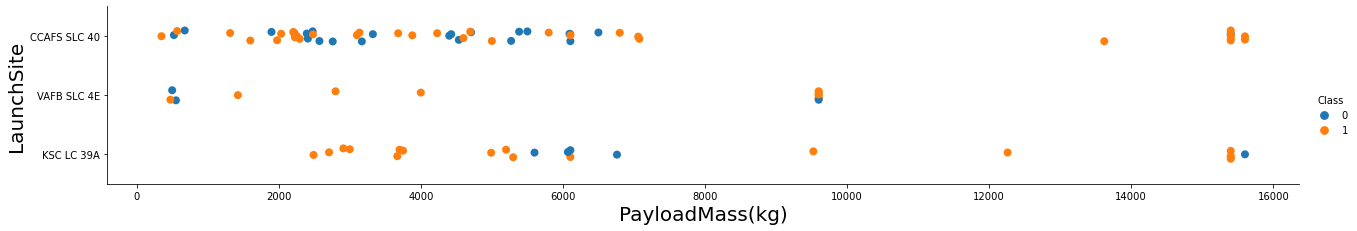

In [93]:
#2. Visualize the relationship between Payload and Launch Site
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, height=3, aspect = 6, s=8)
plt.xlabel("PayloadMass(kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)

plt.show()

Del gráfico 2. se concluye: 
- El sitio KSC LC 39A no soporta de buena forma lanzamientos con *PayloadMass* alrededor de 6 ton (De suponer que esto es por el *FlightNumber* el graf.1 demuestra lo contrario). Tiene un buen rendimiento en general para otros tonelajes
- El sitio VAFB SLC no  contiene lanzamientos de +10ton de *PayloadMass*

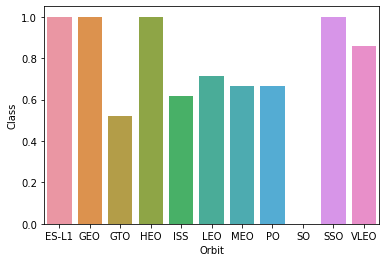

,0,1,2,3,4,5,6,7,8,9,10
Orbit,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
Class,1.0,1.0,0.518519,1.0,0.619048,0.714286,0.666667,0.666667,0.0,1.0,0.857143


In [79]:
#3. Visualize the relationship between success rate of each orbit type


success_by_orbit = df[['Orbit','Class']].groupby(['Orbit'],as_index=False).mean()
sns.barplot(x = 'Orbit', y='Class', data=success_by_orbit)
plt.show()

success_by_orbit.transpose()

Del gráfico 2 se concluye:
- Hay 4 órbitas con 100% de éxito, estas son ES-1, GEO, HEO, SSO
- La órbita GTO tiene la tasa de éxito más baja, con 51,8%

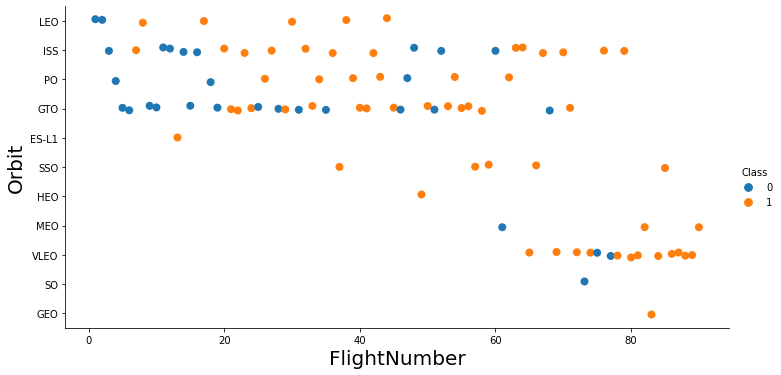

In [95]:
#4. Visualize the relationship between FlightNumber and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, height=5, aspect = 2,s=8)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)

plt.show()

Del gráfico 4 se concluye:
- En la Órbita LEO, luego de 2 vuelos se consigue el éxito en todos los lanzamientos
- GTO no guarda relación con el n° de vuelo

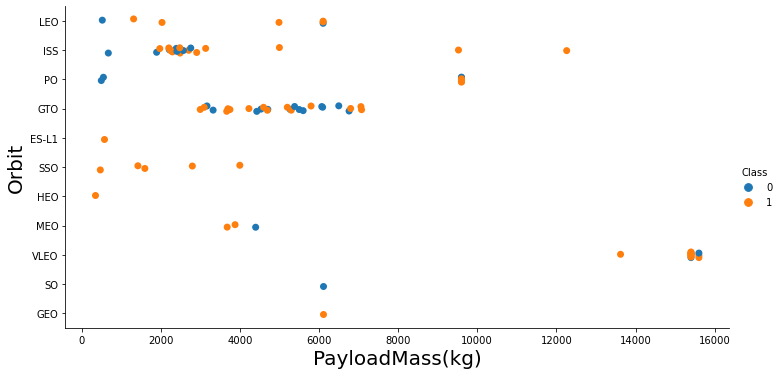

In [96]:
#5. Visualize the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, height=5, aspect = 2, s=7)
plt.xlabel("PayloadMass(kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)

plt.show()

Del gráfico 5 se concluye:
- Cargas de +13ton sólo se envían a la órbita VLEO
- Cargas de +10ton y -13ton se envían a las órbitas PO y ISS
- En ISS,  a mayor carga, mayor es la probabilidad de éxito
- En GTO el éxito no depende de la carga


Text(0.5, 1.0, 'Launch Success Yearly Trend')

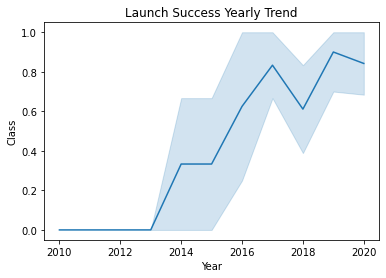

In [99]:
#6. Visualize the launch success yearly trend
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Year'] = pd.DatetimeIndex(df['Date']).year
sns.lineplot(y="Class", x="Year", data=df).set_title('Launch Success Yearly Trend')

Del gráfico 6 se concluye:
- Hasta 2013 no hubo lanzamientos exitosos, luego, el éxito va al alza hasta 2020

#### 2.1.2.1 Features Engineering

En adelante, se obtendrán algunos *insights* preliminares de cómo cada variable relevante afecta aterrizaje exitoso de la *First Stage*

In [83]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [84]:
# 7. Create dummy variables to categorical columns
features_one_hot = pd.concat([features,pd.get_dummies(df['LandingPad'])], axis=1)
features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['LaunchSite'])], axis=1)
features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Serial'])], axis=1)
features_one_hot = pd.concat([features_one_hot,pd.get_dummies(df['Orbit'])], axis=1)
features_one_hot.drop(['LandingPad','LaunchSite','LandingPad','Serial', 'Orbit'], axis=1,inplace=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E,B0003,B0005,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1010,B1011,B1012,B1013,B1015,B1016,B1017,B1018,B1019,B1020,B1021,B1022,B1023,B1025,B1026,B1028,B1029,B1030,B1031,B1032,B1034,B1035,B1036,B1037,B1038,B1039,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [85]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)
features_one_hot.dtypes

count=0
float_var=0
for i in features_one_hot.dtypes:
    count+=1
    if i == 'float64':
        float_var+=1
print('Total variables : ',count)
print('Total variables float64 : ',float_var)


Total variables :  80
Total variables float64 :  80


# 3. Interactive Visual analytics and Dashboard

## 3.1 Data bisualization

### 3.1.1 LAB:  Launch Sites Analysis with folium

>   **Objetivos:**\
    - Mark all launch sites on a map\
    - Mark the success/failed launches for each site on the map\
    - Calculate the distances between a launch site to its proximities


In [22]:
!pip3 install folium
!pip3 install wget

     |████████████████████████████████| 95 kB 8.7 MB/s  eta 0:00:01
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=384fdc8eb83d6c805c40edfaa43bd87b0fb159838167ebea2a2d42614b22307e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [23]:
import folium
import wget
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
print('Done')

Done


In [24]:
#LOAD DATA
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

#KEEP RELEVANT ATTRIBUTES
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

launch_sites_df.head()

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


In [25]:
#CREAMOS UN MAPA EN FOLIUM Y PARTIMOS CON MARCAR LA LOCACIÓN DE REFERENCIA
# JOHNSON SPACE CENTER DE LA NASA
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)


#MARCADOR CIRCULAR PARA EL NASA SPACE CENTER
circle = folium.Circle(nasa_coordinate,
                       radius=1000,
                       color='#d35400',
                       fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

#### 3.1.1.1 Marcar todos los sitios de lanzamiento en un mapa

Creamos un `folium.Circle` and `folium.Marker`para c/locacion

In [26]:
launch_sites_df['Lat,Long']= launch_sites_df[['Lat','Long']].values.tolist()
launch_sites_df.head()

for launch_site_coord,launch_site in launch_sites_df[['Lat,Long','Launch Site']].itertuples(index=False):
    circle = folium.Circle(launch_site_coord,
                           radius=1000,
                           color='#d35400',
                           fill=True).add_child(folium.Popup(launch_site))
    marker = folium.map.Marker(
        launch_site_coord,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % launch_site,
            )
        )
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

Del mapa anterior, se responden dos preguntas:
-   Are all launch sites in proximity to the Equator line?\
    R: No, all launch sites are far from Equator line
    
    
-   Are all launch sites in very close proximity to the coast?\
    R: Yes

#### 3.1.1.2 Mark the success/failed launches for each site on the map

Marcaremos con verde si el lanzamiento tuvo exito, rojo en caso contrario

Al pensar en el mapa, para c/*Launch Site* tendremos muchos lanzmientos agrupados sobre él. Para simplificar esta situación, se utiliza un `MarkerCluster` object

In [28]:
marker_cluster = MarkerCluster()

#Crear la columna marker_color
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)


# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
spacex_df['Lat,Long']= spacex_df[['Lat','Long']].values.tolist()
for launch_site_coord, color in spacex_df[['Lat,Long','marker_color']].itertuples(index=False):
    # TODO: Create and add a Marker cluster to the site map
    marker = folium.Marker(
        launch_site_coord,
        # Create an icon as a text label
        icon=folium.Icon(color='white', icon_color=color
        ))

    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map


#### 3.1.1.3 Calculate the distances between a launch site to its proximities

Se requiere explorar y analizar la proximidad de los *Launch Sites*. El primer paso es añadir un `MousePosition` en el mapa para obtener coordenadas de cualquier punto del mapa en donde ubique el cursor. 

In [29]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [30]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance
'''
0	CCAFS LC-40		28.562302	-80.577356
1	CCAFS SLC-40	28.563197	-80.576820
2	KSC LC-39A		28.573255	-80.646895
3	VAFB SLC-4E		34.632834	-120.610746
'''
#1. Calcular la distancia entre el LaunchSite CCAFS SLC-40 v/s la costa 
CCAFS_SLC_40_coord = [28.563197, -80.576820]
coast_coord = [28.563197, -80.56799]

distance_coastline = calculate_distance(CCAFS_SLC_40_coord[0],CCAFS_SLC_40_coord[1],
                                        coast_coord[0],coast_coord[1])

#2. Añadir un marcador en la costa
coastline_marker = folium.Marker(
    coast_coord,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
        )
    )
#site_map.add_child(coastline_marker)


#3. Dibuar una línea entre el LaunchSite CCAFS SLC-40 v/s la costa
site_and_coast_coord = [CCAFS_SLC_40_coord,coast_coord]
lines=folium.PolyLine(locations=site_and_coast_coord, weight=1)
#site_map.add_child(lines)
site_map

In [31]:
#1. Calcular la distancia entre el LaunchSite CCAFS SLC-40 v/s la costa 
CCAFS_SLC_40_coord = [28.563197, -80.576820]
coast_coord = [28.563197, -80.56799]
city_coord = [28.40128,-80.60413]
highway_coord = [28.56319,-80.57076]
railway_coord = [28.57206,-80.58526]
places_coord = [coast_coord,city_coord,highway_coord,railway_coord]
#distances = dict.fromkeys(['to_coast','to_city','to_highway','to_railway'])
distances = []

for place in places_coord:
    distance = calculate_distance(CCAFS_SLC_40_coord[0],CCAFS_SLC_40_coord[1],
                                        place[0],place[1])
    #2. Añadir un marcador en la costa
    place_marker = folium.Marker(
    place,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
        )
    )
    site_map.add_child(place_marker)

    #3. Dibuar una línea entre el LaunchSite CCAFS SLC-40 v/s la costa
    to_site_coord = [CCAFS_SLC_40_coord,place]
    lines=folium.PolyLine(locations=to_site_coord, weight=1)
    site_map.add_child(lines)
site_map

# 4. Predictive Analysis (Classification)

## 4.1 Machine Learning

### 4.1.1 LAB: ML Prediction

> **Objetivos:**\
    Realizar EDA para determinar las *Training Labels* \
    - Crear una columna para la class\
    - Estandarizar la data\
    - Didividir en training y test set\
    - Encontrar los mejores *Hyperparam* para SVM, Classification Trees and Logistic Regression
    
 
    


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
print('loaded')

loaded


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    

data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### 4.1.1.1 Transformar la variable a predecir en un np array

In [4]:
Y= data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### 4.1.1.2 Estandarizar el dataset predictivo

In [5]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

#### 4.1.1.3 Ejecutar el método train/test split

Setear los parámetros:
- `test_size= .2`
- `random_state=2`

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=.2,
                                                   random_state = 2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


#### 4.1.1.4 *Fitting* - Regresión Logística 

Para asegurar los mejores parámetros del modelo,también ejecuta una *grid search* para distintos valores de C.

Para mostrar la mejor combinación de parámetros y su rendimiento, se utiliza `best_params_` y  `best_score_` respectivamente

In [50]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


#### 4.1.1.5 Calcular el *accuracy* de la LogReg con el método `score`

In [51]:
print("score",logreg_cv.score(X_test,Y_test))

score 0.8333333333333334


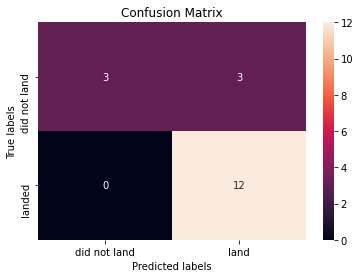

In [52]:
#Mostramos la confusion matrix resultante:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

- La predicción resultante, cuando es un *True Positive*, la certeza es del 80%. 

- Destaca el *True Negative* donde al la certeza es del 100% si el modelo indica que no aterrizará satisfactoriamente

- El riesgo está en el *False Positive*, donde el 20% de los casos donde el modelo indica resultado satisfactorio, la *Stage 1* no aterriza según lo esperado

#### 4.1.1.6 Crear un SVM y optimizar con una GridSearchCV

In [53]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm,parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


#### 4.1.1.7 Calcular el *accuracy* de la SVM con el método `score`

In [54]:
print("score",svm_cv.score(X_test,Y_test))

score 0.8333333333333334


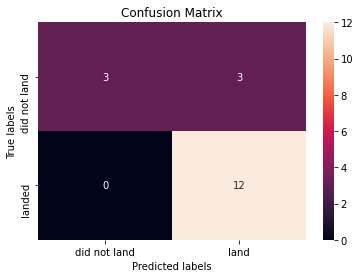

In [55]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

La conclusión de la *confusion matrix* de SVM es idéntica al modelo de LogReg

#### 4.1.1.8 Crear un Decision Tree, y aplicar GridSearchCV de la misma forma

In [67]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8767857142857143


Destaca el accuracy del Decision Tree, +4pp sobre los otros modelos de clasificación

#### 4.1.1.9 Calcular el *accuracy* del Decision Tree con el método `score`

In [68]:
print("score",tree_cv.score(X_test,Y_test))

score 0.8333333333333334


Respecto a la conclusión del punto anterior, al correr el modelo en el *test set*, el rendimiento baja considerablemente, lo anterior supone *overfitting*,lo cual se explica por tener datos sesgados.

Como medida, se propone incluir más observaciones al dataset, así, se tendrá un modelo más generalizado

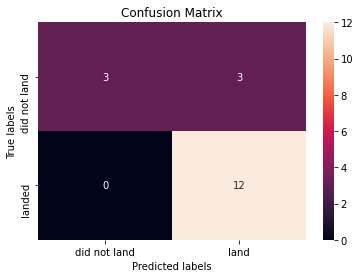

In [69]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

- La predicción resultante, cuando se trata de un *True positive* tiene un 77% de certeza, menor a los LogReg y SVM

- El 30% de los casos en que se proyectó un aterrizaje fallido, este realmente fué satisfactorio (*false positive*), lo cual implica un alto riesgo y mayor a los modelos anteriores

#### 4.1.1.10 Crear un KNN, y aplicar GridSearchCV de la misma forma

In [59]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


#### 4.1.1.11 Calcular el *accuracy* del KNN con el método `score`

In [60]:
print("score",knn_cv.score(X_test,Y_test))

score 0.8333333333333334


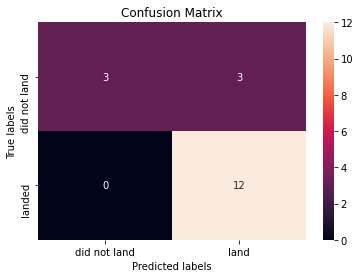

In [61]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 4.1.1.12 ¿Cuál es el mejor modelo?

Dado que sólo el Decision Tree tiene un rendimiento por debajo a los demás modelos, este se descarta, y entre los demás se utiliza la tabla resumen del curso anterior:

| id| Algorithm          | Jaccard | F1-score | LogLoss |
|--| ------------------ | ------- | -------- | ------- |
| 1| LogisticReg|? |? | ?|
| 2| SVM                |? |? | NA |
| 4| KNN                |? |? | NA |




In [71]:
from sklearn import metrics
#Predicted sets:
yhat_logreg_cv = logreg_cv.predict(X_test)
yhat_svm_cv = svm_cv.predict(X_test)
yhat_knn_cv = knn_cv.predict(X_test)
yhat_tree_cv = tree_cv.predict(X_test)

#Metric

#i. Jaccard
print('Logistic Regression Accuracy is: ',metrics.accuracy_score(Y_test,yhat_logreg_cv))
print('SVM Regression Accuracy is: ',metrics.accuracy_score(Y_test,yhat_svm_cv))
print('KNN Regression Accuracy is: ',metrics.accuracy_score(Y_test,yhat_knn_cv))
print('Decision Tree Regression Accuracy is: ',metrics.accuracy_score(Y_test,yhat_tree_cv))
print('----')
#ii. F1-Score
print('Logistic Regression F1-Score is: ',metrics.f1_score(Y_test,yhat_logreg_cv))
print('SVM F1-Score is: ',metrics.f1_score(Y_test,yhat_svm_cv))
print('KNN F1-Score is: ',metrics.f1_score(Y_test,yhat_knn_cv))
print('Decision Tree F1-Score is: ',metrics.f1_score(Y_test,yhat_tree_cv))

print('----')

#iii. LogLoss
yhat_logreg_prob = logreg_cv.predict_proba(X_test)
print('loan Logistic Regression LogLoss Score is: ',metrics.log_loss(Y_test, yhat_logreg_prob))

Logistic Regression Accuracy is:  0.8333333333333334
SVM Regression Accuracy is:  0.8333333333333334
KNN Regression Accuracy is:  0.8333333333333334
Decision Tree Regression Accuracy is:  0.8333333333333334
----
Logistic Regression F1-Score is:  0.888888888888889
SVM F1-Score is:  0.888888888888889
KNN F1-Score is:  0.888888888888889
Decision Tree F1-Score is:  0.888888888888889
----
loan Logistic Regression LogLoss Score is:  0.4786666968559154


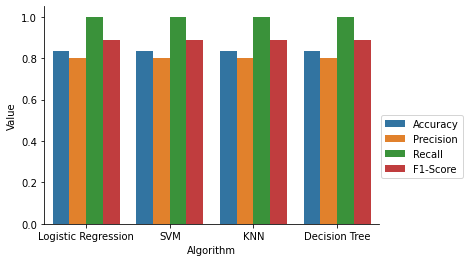

In [72]:
from matplotlib import pyplot
resume = {
    'Algorithm':[
        'Logistic Regression',
        'SVM',
        'KNN',
        'Decision Tree'],
    'Accuracy':[metrics.accuracy_score(Y_test,yhat_logreg_cv),
                metrics.accuracy_score(Y_test,yhat_svm_cv),
                metrics.accuracy_score(Y_test,yhat_knn_cv),
                metrics.accuracy_score(Y_test,yhat_tree_cv)],
    'Precision':[metrics.precision_score(Y_test,yhat_logreg_cv),
                metrics.precision_score(Y_test,yhat_svm_cv),
                metrics.precision_score(Y_test,yhat_knn_cv),
                metrics.precision_score(Y_test,yhat_tree_cv)],
    'Recall':[metrics.recall_score(Y_test,yhat_logreg_cv),
                metrics.recall_score(Y_test,yhat_svm_cv),
                metrics.recall_score(Y_test,yhat_knn_cv),
                metrics.recall_score(Y_test,yhat_tree_cv)],
    'F1-Score':[metrics.f1_score(Y_test,yhat_logreg_cv),
                metrics.f1_score(Y_test,yhat_svm_cv),
                metrics.f1_score(Y_test,yhat_knn_cv),
                metrics.f1_score(Y_test,yhat_tree_cv)],

    
}

#sns.barplot(x = 'Algorithm', y='Accuracy', data = pd.DataFrame.from_dict(resume))

fig, ax1 = pyplot.subplots(figsize=(6,4))
tidy = pd.DataFrame.from_dict(resume).melt(id_vars='Algorithm').rename(columns=str.title)
sns.barplot(x='Algorithm',y='Value', hue='Variable', data=tidy, ax=ax1)
plt.legend(bbox_to_anchor=(1.25, 0.5),borderaxespad=0)
sns.despine(fig)

Dado que los 3 modelos comparten las mismas métricas, se asume que todos tienen el mismo rendimiento.

Este escenario tiene un riesgo latente de tener sobreajuste, **se propone agregar más observaciones al dataset.**
- Otra señal que confirma la teoría es que el dataset tiene casi la misma cantidad de observaciones que de variables

In [20]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [21]:
X.shape

(90, 83)

# 5. Present your Data-Driven Insights

## 5.1 Elementos de un reporte de *Insights* exitoso

>Se aprenderá el cómo representar mis *Insights* haciend foco en elementos específicos para crear un reporte de hallazgos exitoso.

Luego de que los datos fueron recolectados, limpiados y organizados, comienza el trabajo de la interpretación de estos, para obtener una vista completa de la data, y con optimismo, responder las preguntas que se formularon previo al análisis

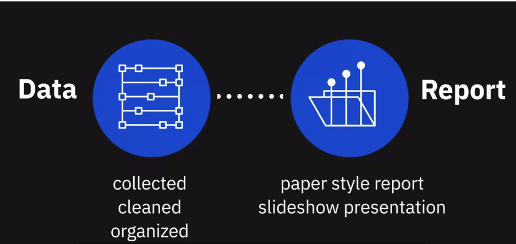

El tipo de reporte idóneo dependerá de los *stakeholders*, y el cómo reciben la información, ya sea en un documento, presentación o ambas


Al inicio de todo el proceso, la información recolectada puede verse un poco agobiante, la mejor forma de enfrentar esta situación, **es partir con un Outline (Esquema/Idea general)**, esto permite tener una imagen completa, y comenzar a redactar de forma simple y precisa.
>**Outline:** Siempre estructurarla **hacia** la audiencia

Los elementos ideales son:
1. **Portada**

1. **Resumen ejecutivo**: Explicar brevemente  los detalles

1. **Tabla de contenidos**

1. **Introducción**: Naturaleza del análisis, establecer el problema y las preguntas a analizar

1. **Metodología**: Explica las fuentes de data y un Outline para la data recolectada, ej qué metodo de análisis se utilizará y el por qué

1. **Resultados**: Entra al detalle de la data recolectada, cómo se organizó y cómo se analizó. Contiene también los gráficos que sostienen los resultados, y lleva la atención a los *insights* más complejos y/o cruciales.

    Mediante esta interpretación de la data, como Scientist quedo habilitado a entregar una explicación detallada a la audiencia y cómo se relaciona al problema que fué definido en la introducción.
    
1. **Discusión** Aquí comienzo a atraer a la audiencia mediante una discusión de de los hallazgos y lo que este implica, 
        Ej si estoy investigando los lenguajes de programación top para un universitario. En este análisis, ¿Necesitan aprender múltiples lenguajes para ser competitivos? o ¿Un lenguaje siempre predominará sobre el resto?
        
1. **Conclusión** Retirea el problema planteado en la introducción y entrega un resumen general de los hallazgos. También indica el resultado del análisis y si se tomarían otras medidas en el futuro.

1. **Anexos** Contiene información que realmente no tiene cabida en la estructura descrita, pero que aún así se considera lo suficientemente importante para incluirla


## 5.2 Buenas prácticas para presentar *Insights* y hallazgos

> Las preguntas ya fueron respondidas, y yo me siento conforme con la historia, ahora\
    **¿Cómo le hablo a la audiencia para que se lleven el *key message*?**
    
### 5.2.1 Entregando el mensaje de forma precisa

1. Asegúrate que los gráficos no son muy pequeños y estén claramente etiquetados
2. Usar la data sólo como evidencia de respaldo
3. Comparte sólo un punto de cada gráfico
4. Elimina la data que no respalda el *key message*

Para evitar poblar la presentación con data de forma excesiva:
> Declarar el mensaje clave que se debe transmitir a la audiencia, luego, construir la historia alrededor de tal mensaje\ 
    Luego, después de formar el esquema de la ppt, volver atrás e insertar la data que soportan los hallazgos
    
> <font size="4"> ***Así, habré creado una historia atractiva, y que genere interés en la audiencia***</font>

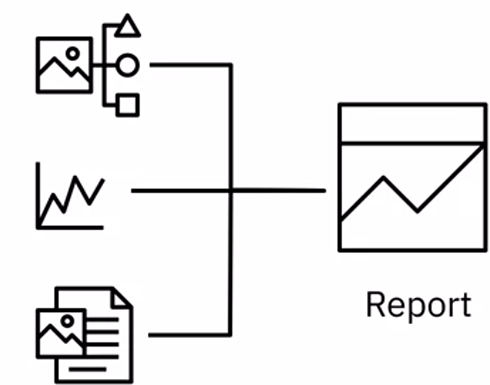


***No caer en la trampa:*** Si algunos ítems del análisis son interesantes para el scientist, en ningún caso implica que necesariamente deba ser relevante para el proyecto. Caer en esto podría dañar el mensaje principal